In [8]:
import scipy.io
import numpy as np
from sklearn import manifold, datasets, model_selection
from sklearn.linear_model import LogisticRegression
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

sizeTitle = 24
sizeAxis = 14

In [2]:
cancer = datasets.load_breast_cancer() # 30D, 569 points

<IPython.core.display.Javascript object>


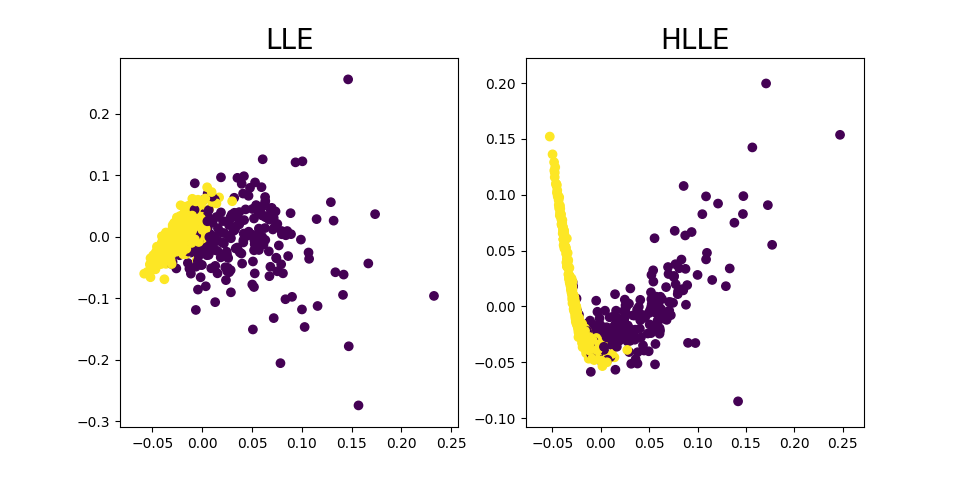

In [3]:
#2D
n_components = 2
n_neighbors = 50

LLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='dense',
                                           method='standard')

HLLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='dense',
                                           method='hessian')

reduced_cancer_LLE = LLE.fit_transform(cancer.data)
reduced_cancer_HLLE = HLLE.fit_transform(cancer.data)

fig = plt.figure(figsize = plt.figaspect(0.5))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 2, 1)
ax.scatter(reduced_cancer_LLE[:,0], reduced_cancer_LLE[:,1], c=cancer.target)
plt.title('LLE', fontsize=sizeTitle)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(reduced_cancer_HLLE[:,0], reduced_cancer_HLLE[:,1], c=cancer.target)
plt.title('HLLE', fontsize=sizeTitle)

plt.show()

<IPython.core.display.Javascript object>


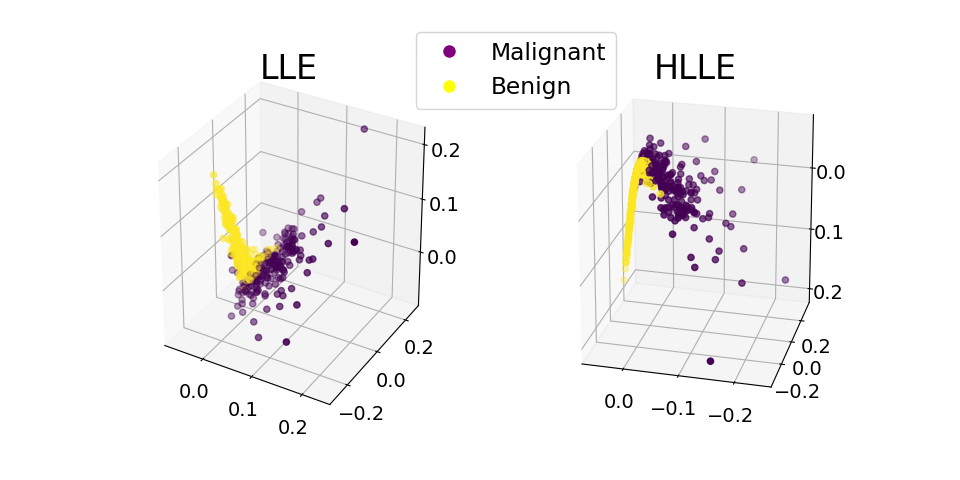

In [28]:
#3D
n_components = 3
n_neighbors = 50

LLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='dense',
                                           method='standard')

HLLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='dense',
                                           method='hessian')

reduced_cancer_LLE = LLE.fit_transform(cancer.data)
reduced_cancer_HLLE = HLLE.fit_transform(cancer.data)

fig = plt.figure(figsize = plt.figaspect(0.5))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(reduced_cancer_LLE[:,0], reduced_cancer_LLE[:,1], reduced_cancer_LLE[:,2], c=cancer.target, label=cancer.target_names)
plt.title('LLE', fontsize=sizeTitle)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Malignant',
                          markerfacecolor='purple', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Benign',
                          markerfacecolor='yellow', markersize=10)]

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(reduced_cancer_HLLE[:,0], reduced_cancer_HLLE[:,1], reduced_cancer_HLLE[:,2], c=cancer.target, label=cancer.target_names)
plt.title('HLLE', fontsize=sizeTitle)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Malignant',
                          markerfacecolor='purple', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Benign',
                          markerfacecolor='yellow', markersize=10)]
ax.legend(handles=legend_elements, fontsize="large", bbox_to_anchor=(0.3, 1.1))

plt.show()

In [29]:
plt.savefig('cancer_LLE_HLLE.eps', format='eps', bbox_inches='tight')

Score with initial 30d dataset: 0.943298969072


<IPython.core.display.Javascript object>


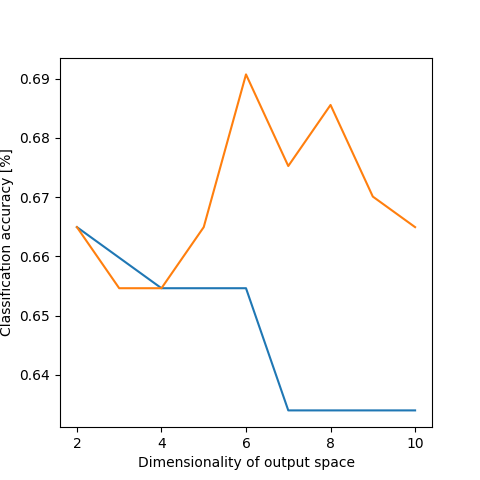

In [88]:
# Perform logistic regression for different embeddings

proportion_train = 0.66
n_neighbors = 70

data_train, data_test, label_train, label_test = model_selection.train_test_split(cancer.data, cancer.target, train_size=proportion_train)
nb_train = len(label_train)

penalty = 1 #misclassification penalty
logreg = LogisticRegression(C=penalty)

logreg.fit(data_train, label_train)

print('Score with initial 30d dataset: ' + str(logreg.score(data_test, label_test)))

n_components = [2,3,4,5,6,7,8,9,10]
scores = np.zeros((2,len(n_components)))

for n,comp in enumerate(n_components):
    LLE = manifold.LocallyLinearEmbedding(n_neighbors, comp,
                                       eigen_solver='dense',
                                       method='standard')

    HLLE = manifold.LocallyLinearEmbedding(n_neighbors, comp,
                                       eigen_solver='dense',
                                       method='hessian')
    
    reduced_cancer_LLE = LLE.fit_transform(np.concatenate((data_train, data_test)))
    reduced_cancer_HLLE = HLLE.fit_transform(np.concatenate((data_train, data_test)))
    
    data_train_LLE = reduced_cancer_LLE[:nb_train, :]
    data_test_LLE = reduced_cancer_LLE[nb_train:, :]
    data_train_HLLE = reduced_cancer_HLLE[:nb_train, :]
    data_test_HLLE = reduced_cancer_HLLE[nb_train:, :]

    logreg.fit(data_train_LLE, label_train)
    scores[0][n] = logreg.score(data_test_LLE, label_test)
    logreg.fit(data_train_HLLE, label_train)
    scores[1][n] = logreg.score(data_test_HLLE, label_test)
    
plt.figure(figsize = plt.figaspect(1))
matplotlib.rcParams.update({'font.size':sizeAxis})

plt.plot(n_components, scores[0], label='LLE')
plt.plot(n_components, scores[1], label='HLLE')

plt.xlabel('Dimensionality of output space')
plt.ylabel('Classification accuracy [%]')

plt.show()